In [126]:
# Python Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as skm
from sklearn import metrics
from collections import Counter


In [127]:
# Read data from csv file
dfCSV = pd.read_csv("C:/Users/princ/Desktop/GROUP - EDA/Survey on Prediction to Determine Online Class Methods Using Machine Learning for Special Topics in Computer Science (CSC649) Project.csv")


In [128]:
# Data Cleaning
dfCSV['University Name'].fillna(dfCSV['University Name'].mode()[0], inplace = True)
dfCSV['Mode of Study'].fillna(dfCSV['Mode of Study'].mode()[0], inplace = True)
dfCSV['Level of Study'].fillna(dfCSV['Level of Study'].mode()[0], inplace = True)
dfCSV['Course Name'].fillna(dfCSV['Course Name'].mode()[0], inplace = True)
dfCSV['Gender'].fillna(dfCSV['Gender'].mode()[0], inplace = True)
dfCSV['House Area'].fillna(dfCSV['House Area'].mode()[0], inplace = True)
dfCSV['Are you take any loan/sponsorship?'].fillna(dfCSV['Are you take any loan/sponsorship?'].mode()[0], inplace = True)
dfCSV['Income per Month'].fillna(dfCSV['Income per Month'].mode()[0], inplace = True)
dfCSV['Device used in doing online classes'].fillna(dfCSV['Device used in doing online classes'].mode()[0], inplace = True)
dfCSV['Do you have any web camera?'].fillna(dfCSV['Do you have any web camera?'].mode()[0], inplace = True)
dfCSV['Which method of online learning do you prefer?'].fillna(dfCSV['Which method of online learning do you prefer?'].mode()[0], inplace = True)
dfCSV['Internet Access Facilities'].fillna(dfCSV['Internet Access Facilities'].mode()[0], inplace = True)
dfCSV['Type of quota'].fillna(dfCSV['Type of quota'].mode()[0], inplace = True)
dfCSV['Network Speed in your area'].fillna(dfCSV['Network Speed in your area'].mode()[0], inplace = True)
dfCSV['Network Service Provider'].fillna(dfCSV['Network Service Provider'].mode()[0], inplace = True)
dfCSV['Stability of internet connection'].fillna(dfCSV['Stability of internet connection'].mode()[0], inplace = True)
dfCSV['Which alternative platform do you prefer in doing online classes?'].fillna(dfCSV['Which alternative platform do you prefer in doing online classes?'].mode()[0], inplace = True)
dfCSV['How many people in your house?'].fillna(dfCSV['How many people in your house?'].mode()[0], inplace = True)
dfCSV['Comfortability when doing online learning'].fillna(dfCSV['Comfortability when doing online learning'].mode()[0], inplace = True)
dfCSV['Level of understanding in online learning.'].fillna(dfCSV['Level of understanding in online learning.'].mode()[0], inplace = True)
dfCSV['Disruption level during online learning.'].fillna(dfCSV['Disruption level during online learning.'].mode()[0], inplace = True)


In [130]:
# Data Transformation
var_mod = ['Mode of Study',
           'Level of Study',
           'Gender',
           'House Area',
           'Are you take any loan/sponsorship?',
           'Income per Month',
           'Device used in doing online classes',
           'Do you have any web camera?',
           'Which method of online learning do you prefer?',
           'Internet Access Facilities',
           'Type of quota',
           'Network Speed in your area',
           'Network Service Provider',
           'Stability of internet connection',
           #'Which alternative platform do you prefer in doing online classes?',
           'How many people in your house?',
           'Comfortability when doing online learning',
           'Level of understanding in online learning.',
           'Disruption level during online learning.']

le = LabelEncoder()

for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])
 

In [131]:
# Data Slicing
x1 = dfCSV.iloc[:, 2:4]
x2 = dfCSV.iloc[:, 5:11] # 11 without Platform, 12 with Platform
x3 = dfCSV.iloc[:, 12:17] # 12 without Platform, 13 with Platform # COMBINE x1 with x2
x4 = dfCSV.iloc[:, 18:22]

x = pd.concat([x1, x2, x3, x4], axis=1, sort=False)
y = dfCSV.loc[:, ['Which method of online learning do you prefer?']]


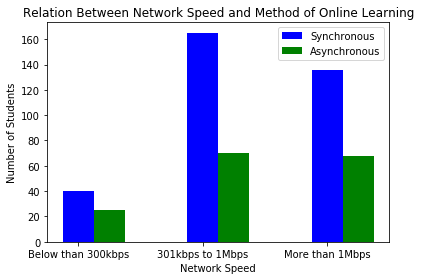

In [135]:
# EDA

# Combine the data
data = pd.concat([x,y], axis=1, sort=False)

# Filter the data
speedBadSynchronous = 0
speedAverageSynchronous = 0
speedGoodSynchronous = 0

speedBadAsynchronous = 0
speedAverageAsynchronous = 0
speedGoodAsynchronous = 0

for i in range(len(data)):
    if data['Which method of online learning do you prefer?'][i] == 1:
            if data['Network Speed in your area'][i] == 1:
                speedBadSynchronous += 1
            elif data['Network Speed in your area'][i] == 0:
                speedAverageSynchronous += 1
            elif data['Network Speed in your area'][i] == 2:
                speedGoodSynchronous += 1
    else:
            if data['Network Speed in your area'][i] == 1:
                speedBadAsynchronous += 1
            elif data['Network Speed in your area'][i] == 0:
                speedAverageAsynchronous += 1
            elif data['Network Speed in your area'][i] == 2:
                speedGoodAsynchronous += 1

# Frequency of the variable
numberOfStudents  = [[speedBadSynchronous, speedAverageSynchronous, speedGoodSynchronous],
        [speedBadAsynchronous, speedAverageAsynchronous, speedGoodAsynchronous]]

# Number of categories, variables
numberOfCategories = 3 

# X Axis categories
categories = np.arange(numberOfCategories)

# Draw the bar chart
plt.bar(categories + 0.00, numberOfStudents[0], color = 'b', width = 0.25, label = 'Synchronous')
plt.bar(categories + 0.25, numberOfStudents[1], color = 'g', width = 0.25, label = 'Asynchronous')

# Fill the bar chart with information
plt.xlabel('Network Speed')
plt.ylabel('Number of Students')
plt.title('Relation Between Network Speed and Method of Online Learning')
plt.xticks(categories, ('Below than 300kbps',
                        '301kbps to 1Mbps',
                        'More than 1Mbps'))

plt.legend()
plt.tight_layout()
plt.show()